In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.5.0


In [2]:
import pandas as pd
import numpy as np

print(pd.__version__)

0.20.3


In [3]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Using TensorFlow backend.


In [4]:
df = pd.read_csv('bbc-text.csv', names=['label', 'comment'], header=None)
df.iloc[0]

df.label.value_counts()

df['label'] = df.label.astype('category').cat.codes
df

df['total_words'] = df['comment'].str.count(' ') + 1
df.head()
df['total_words'].max()


4759

In [5]:
bins=[0,50,75, np.inf]
df['bins']=pd.cut(df.total_words, bins=[0,25,50,75,100,125,150, np.inf], labels=['0-25', '25-50', '50-75','75-100' , '100-125', '125-150','>200'])
#df['num_words'] = count
word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:'counts'})
word_distribution.head()


df.head()

num_class = len(np.unique(df.label.values))
y = df['label'].values

In [6]:

MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.comment.values)
post_seq = tokenizer.texts_to_sequences(df.comment.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.3)
vocab_size = len(tokenizer.word_index) + 1

In [8]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=5, callbacks=[checkpointer])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 128)          3805056   
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2048032   
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 5,853,286
Trainable params: 5,853,286
Non-trainable params: 0
_________________________________________________________________
Train on 1168 samples, validate on 390 samples
Epoch 1/5
1168/1168 [==============================] - 2s 2ms/step - loss: 1.5450 - a

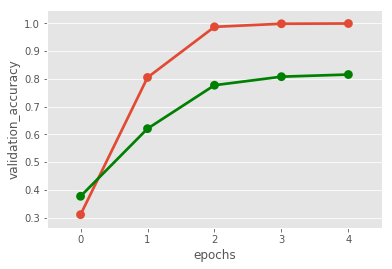

In [9]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [10]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.8248502994011976

In [11]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 128)          3805056   
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2048032   
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 5,853,286
Trainable params: 5,853,286
Non-trainable params: 0
_________________________________________________________________
